In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (20,10)

%matplotlib inline

In [2]:
os.listdir('.')

['output_15_3.png',
 'sensitivity_plot.ipynb',
 'exclusion_version',
 'output_21_1.png',
 'notebook.tex',
 'changing_kaut',
 'wide_params',
 '.ipynb_checkpoints',
 'output_21_2.png',
 'output_15_1.png',
 'sensitivity_plot_hypoxia.ipynb',
 'hypercapnia',
 'dsim.info',
 'output_8_0.png',
 'Figures',
 'model_io',
 'sensitivities.txt',
 'output_28_1.png',
 'output_28_2.png',
 'results.txt',
 'sensitivity_plot_multivar_maxima.ipynb',
 'output_21_0.png',
 'multivar',
 'output_21_3.png',
 'output_8_2.png',
 'sensitivity_plot_hypercapnia.ipynb',
 'output_8_3.png',
 'dtw',
 'output_28_3.png',
 'output_15_2.png',
 'output_15_0.png',
 'output_28_0.png',
 'hypoxia',
 'exc_kaut',
 'output_8_1.png']

## Sensitivities with variable k_aut with healthy data

In [3]:
df_healthy = pd.read_csv('hypoxia/healthy/scaled_inflection/sensitivities.txt', sep='\t')

In [4]:
df_healthy.columns


Index(['Parameter', 'CBF_mu', 'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf',
       'HHb_mu', 'HHb_mu_star', 'HHb_sigma', 'HHb_mu_star_conf', 'CCO_mu',
       'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf', 'TOI_mu', 'TOI_mu_star',
       'TOI_sigma', 'TOI_mu_star_conf', 'HbO2_mu', 'HbO2_mu_star',
       'HbO2_sigma', 'HbO2_mu_star_conf', 'TOTAL_mu', 'TOTAL_mu_star',
       'TOTAL_sigma', 'TOTAL_mu_star_conf'],
      dtype='object')

In [5]:
df_healthy.sort_values(by="TOTAL_mu_star", ascending=False)

,Parameter,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,HHb_mu,HHb_mu_star,HHb_sigma,HHb_mu_star_conf,CCO_mu,...,TOI_sigma,TOI_mu_star_conf,HbO2_mu,HbO2_mu_star,HbO2_sigma,HbO2_mu_star_conf,TOTAL_mu,TOTAL_mu_star,TOTAL_sigma,TOTAL_mu_star_conf
94,sigma_coll,0.0,0.0,0.0,0.0,-453925.652391,596662.278625,5.308330e+06,1.033895e+06,-8.190491e-02,...,44408.545953,9002.917084,-549590.293559,722407.912105,6.427026e+06,1.261308e+06,-1.007957e+06,1.323512e+06,1.173506e+07,2.274189e+06
85,R_auto,0.0,0.0,0.0,0.0,525300.890791,525301.171948,5.252931e+06,1.048996e+06,-8.927776e-02,...,0.140947,0.026763,635997.231272,635997.661043,6.359953e+06,1.283279e+06,1.161298e+06,1.161299e+06,1.161288e+07,2.260565e+06
59,n_h,0.0,0.0,0.0,0.0,-76133.618502,76133.778276,7.147895e+05,1.380075e+05,-1.696326e-01,...,0.226397,0.042696,-92178.266880,92178.507102,8.654269e+05,1.716372e+05,-1.683121e+05,1.683126e+05,1.580217e+06,2.991859e+05
91,r_t,0.0,0.0,0.0,0.0,-39880.429401,39885.665775,3.988242e+05,7.627012e+04,-9.876096e-02,...,0.294274,0.052925,-48284.906562,48291.593937,4.828738e+05,9.858140e+04,-8.816546e+04,8.817823e+04,8.816979e+05,1.766582e+05
58,mu_max,0.0,0.0,0.0,0.0,-39882.201697,39882.817523,3.988241e+05,7.861558e+04,3.667550e-01,...,0.786692,0.153421,-48287.115470,48287.834774,4.828739e+05,9.626651e+04,-8.816895e+04,8.817130e+04,8.816985e+05,1.715401e+05
60,n_m,0.0,0.0,0.0,0.0,4507.770179,4512.741462,4.510068e+04,8.930591e+03,1.532180e-01,...,1.671579,0.302944,5460.420389,5461.339269,5.460509e+04,1.052798e+04,9.968510e+03,9.974455e+03,9.970573e+04,1.947565e+04
89,r_m,0.0,0.0,0.0,0.0,-240.515185,241.808222,2.131771e+03,4.278529e+02,9.453930e-02,...,93220.604863,18461.612316,-255.797571,263.060111,2.564418e+03,4.931486e+02,8.825819e+03,9.773962e+03,9.311707e+04,1.776213e+04
76,P_v,0.0,0.0,0.0,0.0,0.007545,0.153862,6.710712e-01,1.267689e-01,-3.089007e-02,...,48812.127398,9376.817253,0.011489,0.142450,5.933047e-01,1.095705e-01,4.881242e+03,4.881629e+03,4.881213e+04,9.407571e+03
82,phi,0.0,0.0,0.0,0.0,354.520792,354.694326,3.544248e+03,6.605134e+02,2.214313e-01,...,0.266884,0.049869,429.114302,429.854805,4.291291e+03,8.464196e+02,7.838255e+02,7.850077e+02,7.835992e+03,1.593341e+03
115,Xtot,0.0,0.0,0.0,0.0,-205.972000,219.125216,2.119501e+03,4.096244e+02,-6.176341e-01,...,0.686654,0.133451,-331.901483,333.712002,2.666161e+03,5.400860e+02,-5.384179e+02,5.537116e+02,4.737377e+03,9.200239e+02


In [6]:
df_healthy.shape

(122, 25)

In [7]:
df_healthy.columns

Index(['Parameter', 'CBF_mu', 'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf',
       'HHb_mu', 'HHb_mu_star', 'HHb_sigma', 'HHb_mu_star_conf', 'CCO_mu',
       'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf', 'TOI_mu', 'TOI_mu_star',
       'TOI_sigma', 'TOI_mu_star_conf', 'HbO2_mu', 'HbO2_mu_star',
       'HbO2_sigma', 'HbO2_mu_star_conf', 'TOTAL_mu', 'TOTAL_mu_star',
       'TOTAL_sigma', 'TOTAL_mu_star_conf'],
      dtype='object')

In [8]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df_healthy = df_healthy.query("Parameter!='{}'".format(p))
df_healthy.shape

(122, 25)

In [19]:
def sensitivity(df, output):
    param = (output+"_mu_star", output+"_sigma")
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param[0]].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param[0]: x_scaled.flatten()})
    df_mu = df_norm.sort_values(by=param[0], ascending=False)
    
    df_sigma = df.sort_values(by=param[1], ascending=False)
    with sns.plotting_context("talk"):
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
        sns.barplot(x=param[0], y="Parameter", data=df_mu.head(10), ax=ax[0])
        sns.barplot(x=param[1], y="Parameter", data=df_sigma.head(10), ax=ax[1])
        ax[0].set_title(output + ": $\mu_{*}$")
        ax[1].set_title(output + ": $\sigma$")
        plt.tight_layout()
        plt.savefig('Figures/hypoxia/wide_params/healthy/{}.png'.format(output))
        plt.show()
        plt.close()
    sensitive_parameters = df_mu.head(10)['Parameter']
    
    return ax, df_norm, sensitive_parameters

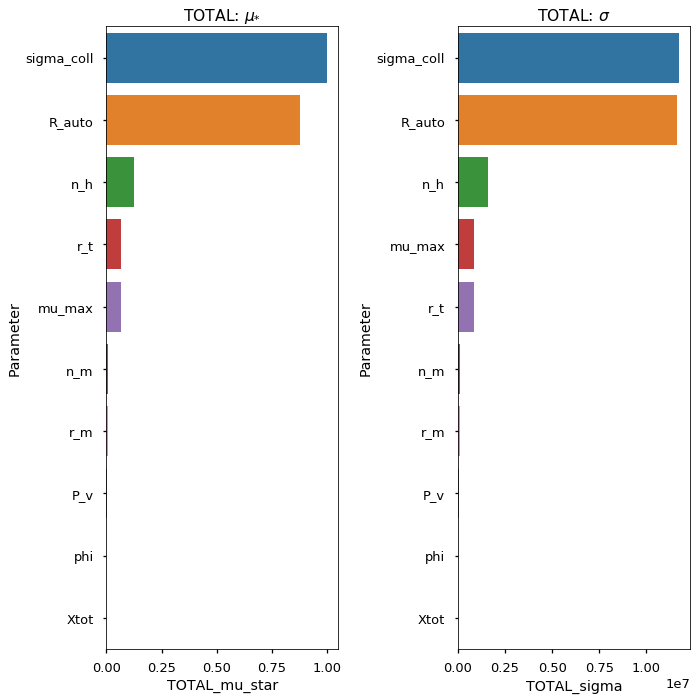

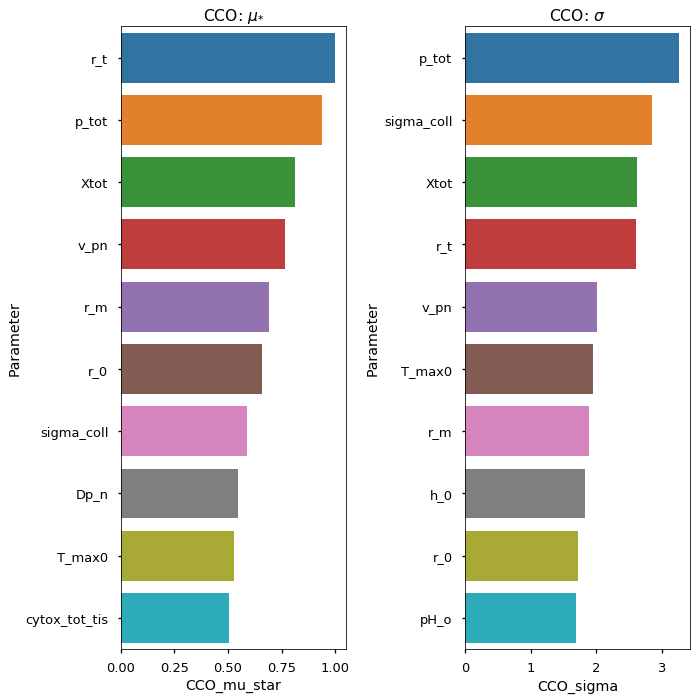

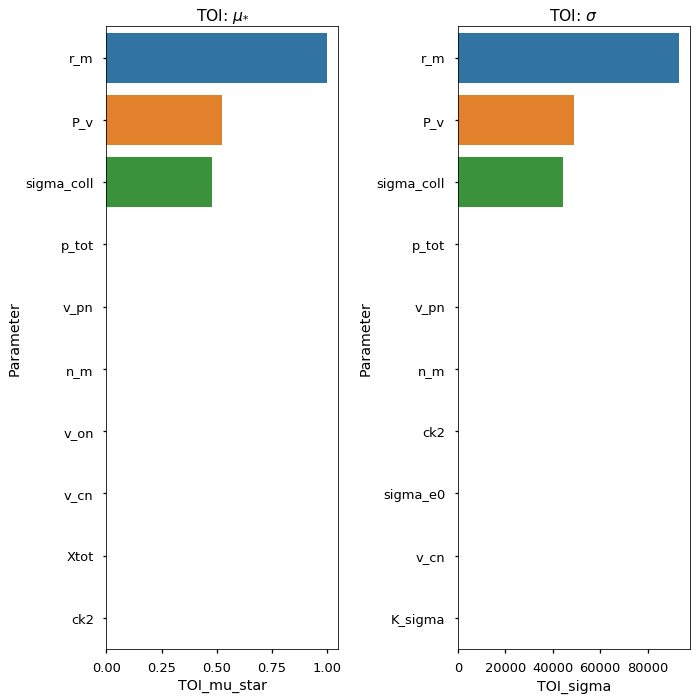

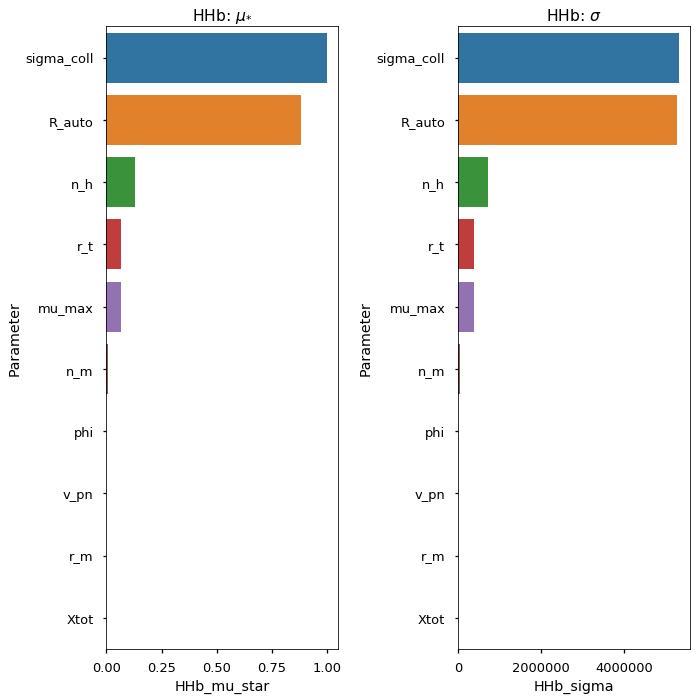

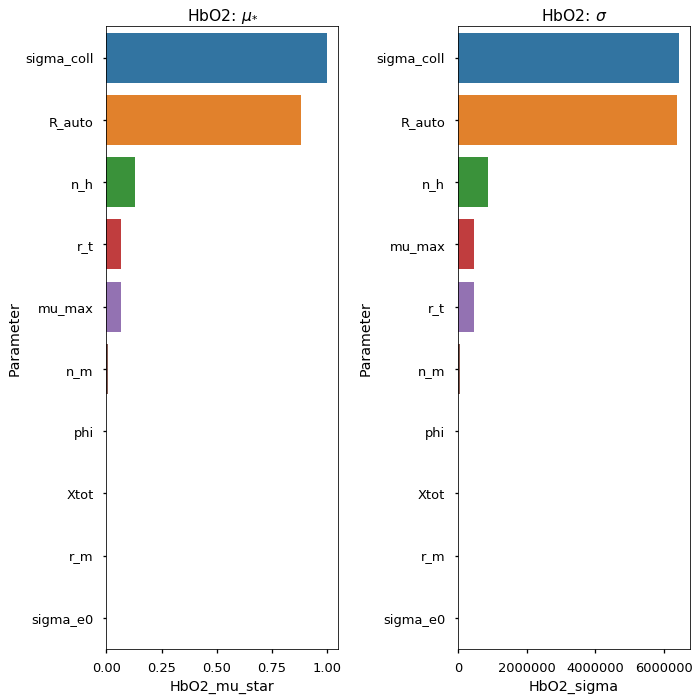

In [20]:
sens_params_healthy = {}
for o in ["TOTAL", "CCO", "TOI", "HHb", "HbO2"]:
    ax, df_norm, sens_p = sensitivity(df_healthy, o)
    sens_params_healthy[o] = list(sens_p)


## Comparing healthy and impaired

In [21]:
sens_params_healthy['TOTAL']

['sigma_coll',
 'R_auto',
 'n_h',
 'r_t',
 'mu_max',
 'n_m',
 'r_m',
 'P_v',
 'phi',
 'Xtot']

In [12]:
healthy = set(sens_params_healthy['TOTAL'])
#impaired = set(sens_params_impaired['TOTAL'])

#print(healthy.intersection(impaired))